## Question 1
b) Write two small programs implementing the weight update rule for the perceptron and the Adaline for an arbitrary number of input (dimension of input x) and  arbitrary training patterns. Initial values for the weights could be selected randomly in the interval [-1 1].

In [ ]:
import numpy as np
np.random.seed(300)

In [ ]:
class Perceptron():
  def __init__(self, learning_rate, n_epochs):
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
  
  def fit(self, X, y):
    X, y = np.array(X), np.array(y)
    n_samples, n_dim = X.shape # get number of samples and dimensions of input data X
    self.weights = np.random.uniform(-1, 1, size=n_dim) # randomly initialize weights between -1 and 1

    for _ in range(self.n_epochs):
      count_incorrect = 0

      for data, target in zip(X, y):
        # check if data point is misclassified
        if self.predict(data) != target:
          count_incorrect += 1

        # update rule
        delta_w = self.learning_rate * (target - self.predict(data)) * data
        self.weights += delta_w
      
      # break out of loop early if model classifies all points correctly
      if count_incorrect == 0:
        break

    print('The weights are: {}'.format(self.weights))
    return self.weights

  def activation_func(self, X):
    # step function
    return np.where(X >= 0, 1, 0)
  
  def predict(self, X):
    # get predictions
    output = np.dot(X, self.weights)
    predicted = self.activation_func(output)
    return predicted

In [ ]:
class Adaline():
  def __init__(self, learning_rate, n_epochs):
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
  
  def fit(self, X, y):
    X, y = np.array(X), np.array(y)
    n_samples, n_dim = X.shape # get number of samples and dimensions of input data X
    self.weights = np.random.uniform(-1, 1, size=n_dim) # randomly initialize weights between -1 and 1 

    for _ in range(self.n_epochs):
      for data, target in zip(X, y):
        # update rule from part a)
        delta_w = self.learning_rate * (target - self.predict(data)) * \
                  self.predict(data)**2  * np.exp( -(np.dot(self.weights, data) ) ) * data
        self.weights += delta_w

        # if delta_w is very small, break out of loop early
        if np.all(abs(delta_w) < 1.0e-06):
          break
      else:
        continue
      break
    
    print('The weights are: {}'.format(self.weights))
    return self.weights

  def activation_func(self, X):
    # sigmoid activation
    return 1 / (1 + np.exp(-X) )
  
  def predict(self, X):
    output = np.dot(X, self.weights)
    predicted = self.activation_func(output)
    return predicted

c) We need to classify the following patterns using boundaries obtained from the perceptron and the Adaline. These data points are located in 3D space and the first component x0  of each vector is the artificial input associated with w0, which plays the role of the bias term (-q  ). The remaining entries of the vector are the actual location of the data point in 3D space.

Class “C1=0” (x1=[-1, 0.8, 0.7, 1.2] , x2=[-1, -0.8,- 0.7, 0.2], x3=[-1, -0.5,0.3,- 0.2],  x4=[-1, -2.8, -0.1, -2])  
Class “C2=1” (y1=[-1, 1.2,- 1.7, 2.2] , y2=[-1, -0.8,-2, 0.5], y3=[-1, -0.5,-2.7,- 1.2],  y4=[-1, 2.8, -1.4, 2.1])

If you are able to separate these classes, provide the equation of the boundaries in the case 
of the perceptron and the case of the Adaline. Draw, the data points of the two classes, and 
the corresponding boundaries in 3D Cartesian space (remember the first entry of each vector, is not part of the coordinate of the data point in 3D). Use the value of $\eta = 0.6$

In [ ]:
c1 = np.array([ [-1, 0.8, 0.7, 1.2], [-1, -0.8,- 0.7, 0.2], [-1, -0.5,0.3,- 0.2], [-1, -2.8, -0.1, -2] ])
c2 = np.array([ [-1, 1.2,- 1.7, 2.2], [-1, -0.8,-2, 0.5], [-1, -0.5,-2.7,- 1.2], [-1, 2.8, -1.4, 2.1] ])
X = np.concatenate([c1, c2])
y = np.array([0 for x in range(4)] + [1 for x in range(4)]) # target values

In [ ]:
# Perceptron
perceptron = Perceptron(learning_rate=0.6, n_epochs=300)
perceptron_weights = perceptron.fit(X, y)
perceptron_predictions = perceptron.predict(X)
print('The predictions are: {}'.format(perceptron_predictions))

The weights are: [ 1.10224514  0.64204468 -1.40183749  0.24155141]
The predictions are: [0 0 0 0 1 1 1 1]


In [ ]:
# Adaline
adaline = Adaline(learning_rate=0.6, n_epochs=300)
adaline_weights = adaline.fit(X, y)
adaline_predictions = adaline.predict(X)
print('The predictions are: {}'.format(adaline_predictions))

The weights are: [ 2.52468873  1.99122029 -3.24367603 -0.30381488]
The predictions are: [2.74684730e-02 1.29222056e-01 1.17435427e-02 7.70185903e-04
 9.91081174e-01 9.01834808e-01 9.96323842e-01 9.99045972e-01]


In [ ]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

def plot_boundary(method, weights, c1, c2, view=25):
  print('The equation of the boundary for {} is: \n ({} - {}*x - ({})*y) / {}'.format(method, weights[0], weights[1], weights[2], weights[3]))
  fig = plt.figure(figsize=(10,6))
  ax = plt.axes(projection='3d')
  x = np.linspace(-3, 3, 100)
  y = np.linspace(-3, 3, 100)

  xv, yv = np.meshgrid(x, y)
  boundary = (weights[0] - weights[1] * xv - weights[2] * yv) / weights[3]
  ax.plot_surface(xv,yv, boundary, cmap=plt.get_cmap('Greys'))
  
  ax.scatter(c1[:,1], c1[:,2], c1[:, 3], c='b', marker='x', label='C1=0')
  ax.scatter(c2[:,1], c2[:,2], c2[:, 3], c='r', marker='o', label='C2=1')
  ax.legend(loc='best')

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title('Boundary created using {}'.format(method))
  ax.view_init(0, view)

The equation of the boundary for Perceptron is: 
 (1.1022451374001094 - 0.6420446834270908*x - (-1.4018374949412433)*y) / 0.24155140753283533


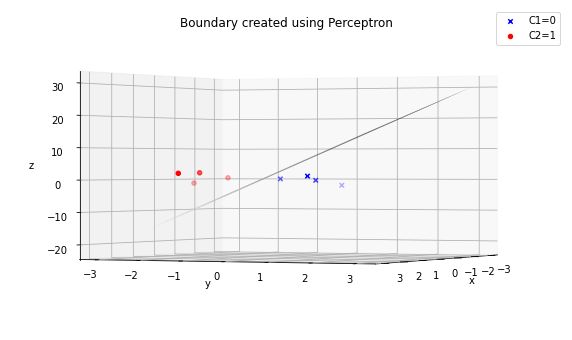

In [ ]:
plot_boundary('Perceptron', perceptron_weights, c1, c2)

The equation of the boundary for Adaline is: 
 (2.5246887268795954 - 1.9912202870684885*x - (-3.24367603276392)*y) / -0.3038148849291844


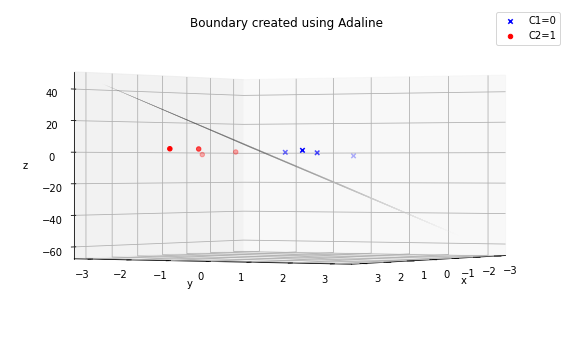

In [ ]:
plot_boundary('Adaline', adaline_weights, c1, c2, view=31)

d) (2 marks) We need to place a new data point belonging to “C1” in the location x5=[-1.4,- 1.5, 2]. Is the classifier boundary still valid (for both perceptron and Adaline)

In [ ]:
x5 = np.array([[-1, -1.4, -1.5, 2]])
percep_prediction = perceptron.predict(x5)
adaline_prediction = adaline.predict(x5)
c1 = np.append(c1, x5, axis=0)

The Perceptron classified this point as: 1
The equation of the boundary for Perceptron is: 
 (1.1022451374001094 - 0.6420446834270908*x - (-1.4018374949412433)*y) / 0.24155140753283533


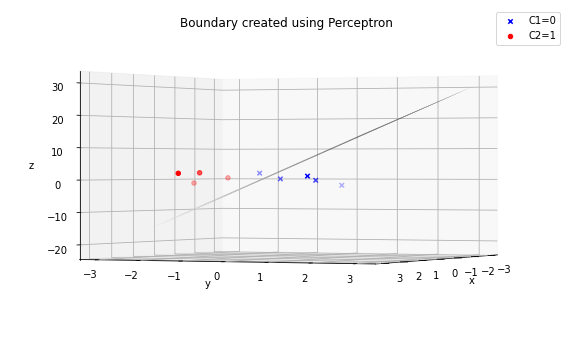

In [ ]:
print('The Perceptron classified this point as: {}'. format(percep_prediction[0]))
plot_boundary('Perceptron', perceptron_weights, c1, c2)

The Adaline classified this point as: 0.25835945191449106
The equation of the boundary for Adaline is: 
 (2.5246887268795954 - 1.9912202870684885*x - (-3.24367603276392)*y) / -0.3038148849291844


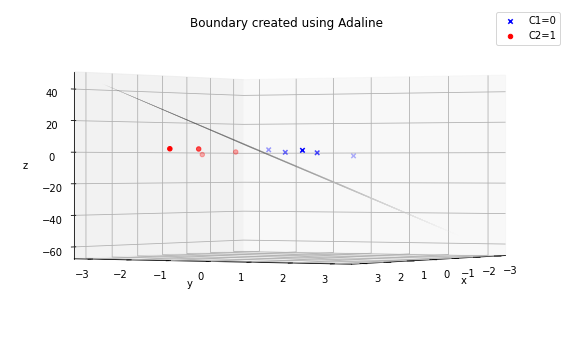

In [ ]:
print('The Adaline classified this point as: {}'. format(adaline_prediction[0]))
plot_boundary('Adaline', adaline_weights, c1, c2, view=31)



> Therefore, the Perceptron boundary is not valid for this new point, however, the Adaline boundary is valid for this new point.



## Question 2
Build a Madaline structure that is able to provide a compounded boundary (composed of two elementary boundaries) for the Exclusive Nor logic (XNOR) gate with two inputs. Draw the boundary in a 2D cartesian plot and show that the obtained compounded boundary (composed of two boundaries) is able to separate the two output classes (1 and -1).

In [ ]:
import numpy as np
def activation_func(x):
  if x > 0:
    return 1
  else:
    return -1

def madaline(input, w):
  adaline_1 = input[0] * w[1] + input[1] * w[2] + w[0]
  q_1 = activation_func(adaline_1)

  adaline_2 = input[0] * w[3] + input[1] * w[4] + w[0]
  q_2 = activation_func(adaline_2)

  q_3 = (q_1 * 1) + (q_2 * 1) - w[0]

  output = activation_func(q_3)
  return output

In [ ]:
weights = np.array([-1.5, -1.0, -1.0, 1.0, 1.0])
input = np.array([-1.0, -1.0])
print("Input {}: {}".format(input, madaline(input, weights)))

Input [-1. -1.]: 1


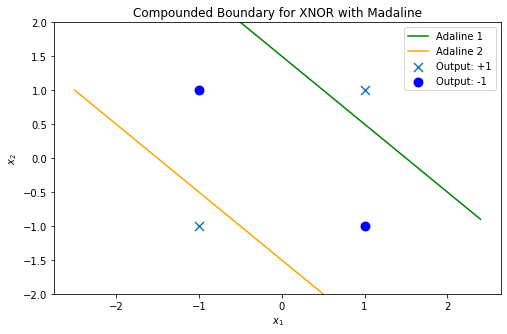

In [ ]:
from matplotlib import pyplot as plt
x = np.arange(-2.5, 2.5, 0.1)
x1_class1 = [1, -1]
x2_class1 = [1, -1]
x1_class2 = [1, -1]
x2_class2 = [-1, 1]
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1_class1, x2_class1, s=80, marker='x', label='Output: +1')
ax.scatter(x1_class2, x2_class2, s=80, marker="o", c='b', label='Output: -1')
ax.plot(x, -x + 1.5, color="green", label='Adaline 1')
ax.plot(x, -x - 1.5, color="orange", label='Adaline 2')
ax.set_title('Compounded Boundary for XNOR with Madaline')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_ylim(-2, 2)
ax.legend(loc='best')

## Question 3

Using  a  feedforward  back-propagation  neural  network  that  contains  a  single  hidden  layer  (with  a 
variable number of hidden nodes each having an activation function of the logistic form), investigate 
the outcome of the neural network for the following mappings: 
 
• $f_1(x) = x*sin(6πx )* exp(-x^2) \quad$ where $x \in [-1, 1]$   
• $f_2(x)=exp(-x^2)* arctan(x)* sin(4πx) \quad$ where $x \in [-2, 2]$. 
 
For each function, create three sets of input/output data, one for training and validation and one for testing. These will be random values within the interval of the variable x). You can choose the ratio as 80% of the data for training (including validation) and 20% of the data for testing. We will use 10-
fold cross validation approach, which means that the training set will be divided into 90% training and 10% for validation.

a) We need to create a 4 by 4 grid of 16 models assessments for each function.

In [ ]:
np.random.seed(457)

In [ ]:
# Function Mappings
def f1(x):
  return x * np.sin(6*np.pi*x) * np.exp(-np.square(x))

def f2(x):
  return np.exp(-np.square(x)) * np.arctan(x) * np.sin(4*np.pi*x)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from keras import initializers

def find_best_model(function, lower, upper):
  i = [10, 40, 80, 200] # number of data points
  j = [2, 10, 40, 100] # number of hidden nodes
  best_val_loss, best_model = float('inf'), 0
  
  for i_, num_points in enumerate(i):
    for j_, num_nodes in enumerate(j):
      # generate random data points
      X = np.random.uniform(lower, upper, num_points)
      y = function(X)

      # train/test split
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

      # 10-fold cross validation
      kfold_val_avg, kfold_train_avg = [], []

      # repeat process 5 times
      for _ in range(5):
        if num_points == 10:
          kf = KFold(n_splits=8, shuffle=True)
        else:
          kf = KFold(n_splits=10, shuffle=True)

        val_scores, train_scores = [], []
        for train_index, val_index in kf.split(X_train):
          X_train_2, X_val = X_train[train_index], X_train[val_index]
          y_train_2, y_val = y_train[train_index], y_train[val_index]

          # model
          model = keras.models.Sequential( [ Dense(num_nodes, activation='sigmoid', input_shape=(1,), 
                                                  kernel_initializer=initializers.RandomNormal(mean=0, stddev=25),
                                                  bias_initializer=initializers.RandomNormal(mean=0, stddev=24) ),
                                            Dense(1, activation='linear')
                                            ])
          model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
          callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=26, verbose=0)]
          # re-train model
          h = model.fit(X_train_2, y_train_2, epochs=750, batch_size=10, validation_data=(X_val, y_val), callbacks=callbacks, verbose=0)
          val_scores.append(h.history['val_loss'][-1])
          train_scores.append(h.history['loss'][-1])

        kfold_val_avg.append(np.mean(val_scores))
        kfold_train_avg.append(np.mean(train_scores))

      avg_validation_loss = np.mean(kfold_val_avg)
      avg_training_loss = np.mean(kfold_train_avg)
      
      if avg_validation_loss < best_val_loss:
        best_model = [num_points, num_nodes]
        best_val_loss = avg_validation_loss

      print('Model with {} points and {} nodes has {} training loss and {} validation loss.\n'.format(num_points, num_nodes, avg_training_loss, avg_validation_loss))
  print('The Best Model has {} data points and {} nodes --> Validation Loss = {}'.format(best_model[0], best_model[1], best_val_loss))

In [ ]:
find_best_model(f1, -1, 1)

Model with 10 points and 2 nodes has 0.11213658838532865 training loss and 0.06183519973822058 validation loss.

Model with 10 points and 10 nodes has 0.15307581112720073 training loss and 0.09457300616741122 validation loss.

Model with 10 points and 40 nodes has 0.04771740288706496 training loss and 0.06235041379121355 validation loss.

Model with 10 points and 100 nodes has 0.0634592538466677 training loss and 0.14551531430097384 validation loss.

Model with 40 points and 2 nodes has 0.10542855612933637 training loss and 0.06130300795659423 validation loss.

Model with 40 points and 10 nodes has 0.10079435274004936 training loss and 0.07133217110764235 validation loss.

Model with 40 points and 40 nodes has 0.07926708873361349 training loss and 0.07985121527686716 validation loss.

Model with 40 points and 100 nodes has 0.06138932347297669 training loss and 0.06908168079331517 validation loss.

Model with 80 points and 2 nodes has 0.0738526163250208 training loss and 0.0575987516622

In [ ]:
find_best_model(f2, -2, 2)

Model with 10 points and 2 nodes has 0.09596340414136648 training loss and 0.05410206258184334 validation loss.

Model with 10 points and 10 nodes has 0.1154511916305637 training loss and 0.02692908646135379 validation loss.

Model with 10 points and 40 nodes has 0.11398811839385417 training loss and 0.12699661110959823 validation loss.

Model with 10 points and 100 nodes has 0.053249078763928995 training loss and 0.09436564803268084 validation loss.

Model with 40 points and 2 nodes has 0.05854585926979781 training loss and 0.03868237202172168 validation loss.

Model with 40 points and 10 nodes has 0.04241482459008693 training loss and 0.034872349770303124 validation loss.

Model with 40 points and 40 nodes has 0.04000010330229998 training loss and 0.04763300196267664 validation loss.

Model with 40 points and 100 nodes has 0.024826127556152645 training loss and 0.03312191363152124 validation loss.

Model with 80 points and 2 nodes has 0.02358982866629958 training loss and 0.023999277

b) Make qualitative and quantitative deductions in light of these simulations and find the  best  model  that  has  acceptable  bias  (complex  enough  model)  and  an acceptable  variance  (no overfitting). Apply the full training data set to this model, and then apply the testing data (which the system  never  saw  and  draw  the  original  functions  and  the  best  model  obtained  through  neural 
network prediction.

In [ ]:
X = np.random.uniform(-1, 1, 200)
y = f1(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# model
f1_model = keras.models.Sequential( [ Dense(100, activation='sigmoid', input_shape=(1,),
                                         kernel_initializer=initializers.RandomNormal(mean=0, stddev=25),
                                         bias_initializer=initializers.RandomNormal(mean=0, stddev=24) ),
                                  Dense(1, activation='linear')
                                  ])
f1_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
callbacks = [keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.0001, patience=26, verbose=0)]
h = f1_model.fit(X_train, y_train, epochs=750, validation_split = 0.2, batch_size=10, callbacks=callbacks, verbose=0)

Text(0.5, 1.0, 'Predicted vs. Actual for Function 1')

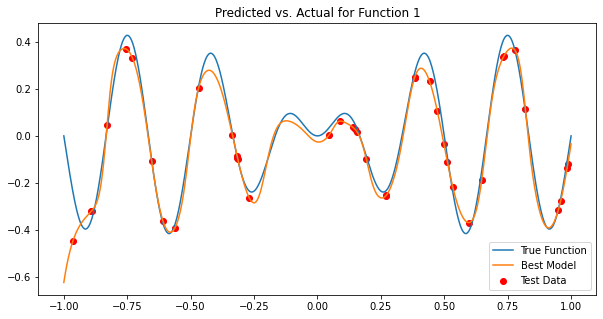

In [ ]:
x = np.linspace(-1, 1, 1000)
y_predicted = f1_model.predict(x)
xtest_predicted = f1_model.predict(X_test)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, f1(x), label='True Function')
ax.plot(x, y_predicted, label='Best Model')
ax.scatter(X_test, xtest_predicted, c='r', label='Test Data')
ax.legend(loc='best')
ax.set_title('Predicted vs. Actual for Function 1')

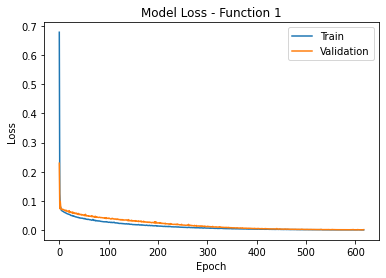

In [ ]:
plt.plot(h.history['loss'], label='Train')
plt.plot(h.history['val_loss'], label='Validation')
plt.title('Model Loss - Function 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
print('Test loss: %.2f %%'%(100*f1_model.evaluate(X_test,y_test, verbose=0)[0]))

Test loss: 0.22 %


In [ ]:
X = np.random.uniform(-2, 2, 200)
y = f2(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# model
f2_model = keras.models.Sequential( [ Dense(100, activation='sigmoid', input_shape=(1,),
                                         kernel_initializer=initializers.RandomNormal(mean=0, stddev=25),
                                         bias_initializer=initializers.RandomNormal(mean=0, stddev=24) ),
                                  Dense(1, activation='linear')
                                  ])
f2_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
callbacks = [keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.00001, patience=26, verbose=0)]
h = f2_model.fit(X_train, y_train, epochs=750, validation_split = 0.2, batch_size=10, callbacks=callbacks, verbose=0)

Text(0.5, 1.0, 'Predicted vs. Actual for Function 2')

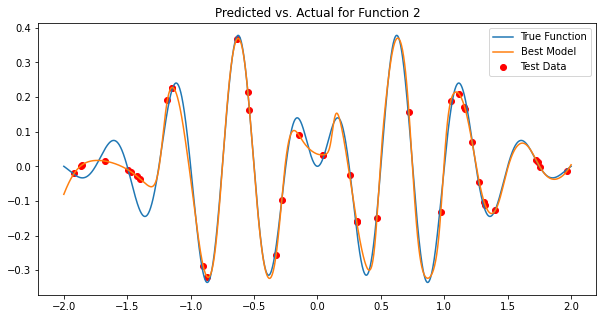

In [ ]:
x = np.linspace(-2, 2, 2000)
y_predicted = f2_model.predict(x)
xtest_predicted = f2_model.predict(X_test)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, f2(x), label='True Function')
ax.plot(x, y_predicted, label='Best Model')
ax.scatter(X_test, xtest_predicted, c='r', label='Test Data')
ax.legend(loc='best')
ax.set_title('Predicted vs. Actual for Function 2')

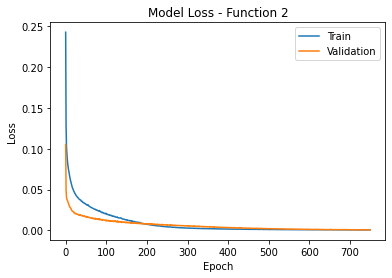

In [ ]:
plt.plot(h.history['loss'], label='Train')
plt.plot(h.history['val_loss'], label='Validation')
plt.title('Model Loss - Function 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

In [ ]:
print('Test loss: %.2f %%'%(100*f2_model.evaluate(X_test,y_test, verbose=0)[0]))

Test loss: 0.08 %


## Question 4
We need to develop a neural network based classifier for three various but related products. The 
collected  data are the results of a chemical analysis of liquid products grown in the same region in 
Italy but derived from three different cultivars. The analysis determined the quantities of 13 
constituents found in each of the three types of products. The data file provided is in text format 
and has fourteen dimensions, the first of which determines the class of products (product ‘1’, 
product ‘2’, product ‘3’), which should serve as the output of the neural network classifier. The 
remaining ones determine the input of the classifier and has 13 constituents as:  
1. Ethanol 
2. Malic acid  
3.  Ash  
4.  Alcalinity of ash  
5.  Magnesium  
6.  Total phenols  
7.  Flavanoids  
8.  Nonflavanoid phenols  
9.  Proanthocyanins  
10. Color intensity  
11. Hue  
12. OD280/OD315 of diluted liquid  
13. Proline

## 4.1 
Build a classifier ( multilayer neural network), vary its parameters 
(number of hidden layers and number of nodes in each layer) and try to find the best possible classification performance (a table illustrating various results as parameters are varied would be preferred). Please discuss.

In [ ]:
import numpy as np
np.random.seed(500)

In [ ]:
# Read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/ECE457B - Assignments/randomized_data.txt', sep=",", header=None)
data.rename(columns={0:'label'}, inplace=True)

In [ ]:
# Data Preprocessing - Normalizing constituents between 0 and 1
from sklearn.preprocessing import MinMaxScaler
y = data.iloc[:, 0]
scaler = MinMaxScaler()
arr_scaled = scaler.fit_transform(data.loc[:, data.columns!='label'])
data = data.loc[:, data.columns!='label']
X = pd.DataFrame(arr_scaled, columns=data.columns,index=data.index)

In [ ]:
# Test-Train Split (75/25)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=457)

In [ ]:
# One-hot Encoding
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import OneHotEncoder
y_train = [[item] for item in y_train]
y_test = [[item] for item in y_test]

enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [ ]:
def create_mlp(num_nodes, num_layers, activation_func, X_train, y_train, X_test, y_test, title):
  mlp = keras.models.Sequential()
  # input layer
  mlp.add(Dense(num_nodes, activation=activation_func, input_shape=(13,) ) )
  for num in range(num_layers):
    # additional layers
    mlp.add(Dense(num_nodes, activation=activation_func))

  mlp.add(Dense(3, activation='softmax')) # output layer
  mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  h = mlp.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

  test_accuracy = 100* mlp.evaluate(X_test, y_test, verbose=0)[1]
  print('Test accuracy: %.2f %%'%(test_accuracy))
  return test_accuracy

In [ ]:
layers = [1, 2, 3, 4, 5]
nodes = [4, 5, 10, 12, 15]

best_accuracy = 0
for num_layers in layers:
  for num_nodes in nodes:
    title = ''
    accuracy = create_mlp(num_nodes, num_layers, 'sigmoid', X_train, y_train, X_test, y_test, '')

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = [num_nodes, num_layers]

print('The best model has {} nodes and {} hidden layers --> test accuracy = {}'.format(best_model[0],best_model[1], best_accuracy))

Test accuracy: 73.33 %
Test accuracy: 88.89 %
Test accuracy: 84.44 %
Test accuracy: 88.89 %
Test accuracy: 84.44 %
Test accuracy: 68.89 %
Test accuracy: 77.78 %
Test accuracy: 93.33 %
Test accuracy: 86.67 %
Test accuracy: 91.11 %
Test accuracy: 44.44 %
Test accuracy: 53.33 %
Test accuracy: 73.33 %
Test accuracy: 66.67 %
Test accuracy: 84.44 %
Test accuracy: 62.22 %
Test accuracy: 66.67 %
Test accuracy: 64.44 %
Test accuracy: 77.78 %
Test accuracy: 68.89 %
Test accuracy: 44.44 %
Test accuracy: 44.44 %
Test accuracy: 66.67 %
Test accuracy: 68.89 %
Test accuracy: 62.22 %
The best model has 10 nodes and 2 hidden layers --> test accuracy = 93.33333373069763


## 4.2
Once this is done, classify (determine to which product they belong) the 
following entries each of which has 13 attributes:  
 a) 13.72; 1.43; 2.5; 16.7; 108; 3.4; 3.67; 0.19; 2.04; 6.8; 0.89; 2.87; 1285  
 b)  12.04; 4.3; 2.38; 22; 80; 2.1; 1.75; 0.42; 1.35; 2.6; 0.79; 2.57; 580  
 c) 14.13; 4.1; 2.74; 24.5; 96; 2.05; 0.76; 0.56; 1.35; 9.2; 0.61; 1.6; 560  

In [ ]:
# Normalize data
test_entries = [
            [13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],
            [12.04, 4.3, 2.38, 22, 80, 2.1, 1.75, 0.42, 1.35, 2.6, 0.79, 2.57, 580],
            [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]
]
scaled = scaler.transform(test_entries)

In [ ]:
model = keras.models.Sequential()
model.add(Dense(best_model[0], activation='sigmoid', input_shape=(13,) ) )
for num in range(best_model[1]):
    # additional layers
    model.add(Dense(best_model[0], activation='sigmoid'))
model.add(Dense(3, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

predict = model.predict(scaled) 
classes=np.argmax(predict,axis=1)

In [ ]:
labels = ['Product 1', 'Product 2', 'Product 3']

In [ ]:
for i in range(3):
  print('{} is classified as {}'.format( test_entries[i], labels[classes[i]] ))

[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285] is classified as Product 1
[12.04, 4.3, 2.38, 22, 80, 2.1, 1.75, 0.42, 1.35, 2.6, 0.79, 2.57, 580] is classified as Product 2
[14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560] is classified as Product 3


In [ ]:
### END OF NOTEBOOK ###